## Lexical richness

This is an indicator of vocabulary variation. This richness gives us an idea of the number of different terms used in a text and the diversity of the vocabulary.

It is generally concerned with how many different words are used in a text.

In [15]:
# imports
import matplotlib.pyplot as plt
from typing import List, Tuple
import numpy as np
import spacy
import os
import pandas as pd

%matplotlib inline

In [16]:
nlp = spacy.load('en_core_web_sm')

#### Pre-processing

In [17]:
### Creating DataFrame

idir = "/home/akhilesh/civicdatalab/samantar_parsers/data/txts/"
df = pd.DataFrame()
all_data = []
for filename in os.listdir(idir):
    if filename.endswith('.txt'):
        with open(idir + filename, 'r') as f:
            data = f.readlines()
        stripped_data = list(map(lambda x: x.strip(), data))
        clean_data = ' '.join(stripped_data)
        corr = (filename.split(".")[0], clean_data)
        all_data.append(corr)

df = pd.DataFrame(all_data)
df.columns = ['year', 'content']

In [18]:
df.head()

,year,content
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...


### Implementation

Lexical Richness measures:

1. Type token ratio
2. Guiraud R index
3. CTTR (Corrected Type Token Ratio)
4. Herdan index
5. Dugast K index
6. Mass M index
7. Dugast U index
8. Tuldava T index
9. Summer S index
10. STTR (Standardized Type-Token ratio

The reason for discussing different lexical measures is to get a better grip on what lexical measures can tell us. 

In [19]:
## Importing all the measures
from measures.vocab_based import type_token_ratio
from measures.vocab_based import guiraud_r
from measures.vocab_based import cttr
from measures.vocab_based import herdan_c
from measures.vocab_based import dugast_k
from measures.vocab_based import maas_a2
from measures.vocab_based import dugast_u
from measures.vocab_based import tuldava_ln
from measures.vocab_based import summer_s
from measures.vocab_based import sttr

#### Terminologies

- Tokens - Number of words
- Types - Number of different words

In [20]:
## Using Spacy's tokenizer
from spacy.tokenizer import Tokenizer

In [25]:
df['tokenised'] = df.content.apply(lambda x: [x.text for x in nlp.tokenizer(x)])

In [26]:
df.head()

,year,content,tokenised
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...,"[SPEECH, OF, SHRI, Y.B.CHAVAN, MINISTER, OF, F..."
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...,"[SPEECH, OF, SHRI, C.SUBRAMANIAM, MINISTER, OF..."
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...,"[SPEECH, OF, SHRI, JAWAHAR, LAL, NEHRU, , PRI..."
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...,"[1, , Budget, , 2001, -, 2002, , Speech, ..."
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...,"[1, , Budget, , 1995, -, 96, , Speech, , o..."


In [27]:
measures = dict(
    type_token_ratio=type_token_ratio,
    guiraud_r=guiraud_r,
    herdan_c=herdan_c,
    dugast_k=dugast_k,
    maas_a2=maas_a2,
    dugast_u=dugast_u,
    tuldava_ln=tuldava_ln,
    cttr=cttr,
    summer_s=summer_s,
    sttr=sttr
)

In [29]:
def get_measures(tokens: List[str], measure: str, window_size: int=100) -> np.float64:
    func = measures[measure]
    total_measure = []
    for i in range(int(len(tokens) / window_size)):
        chunk = tokens[i*window_size: (i*window_size) + window_size]
        txt_len = len(chunk)
        vocab_size = len(set(tokens))
        total_measure.append(func(txt_len, vocab_size))
    return np.mean(total_measure)


In [30]:
df['guiraud_r'] = df['tokenised'].apply(lambda x: get_measures(x, 'guiraud_r'))

/home/akhilesh/venv/p3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [31]:
df.head()

,year,content,tokenised,guiraud_r
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...,"[SPEECH, OF, SHRI, Y.B.CHAVAN, MINISTER, OF, F...",225.2
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...,"[SPEECH, OF, SHRI, C.SUBRAMANIAM, MINISTER, OF...",272.8
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...,"[SPEECH, OF, SHRI, JAWAHAR, LAL, NEHRU, , PRI...",191.3
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...,"[1, , Budget, , 2001, -, 2002, , Speech, ...",315.2
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...,"[1, , Budget, , 1995, -, 96, , Speech, , o...",260.4


In [32]:
df['type_token_ratio'] = df['tokenised'].apply(lambda x: get_measures(x, 'type_token_ratio'))

In [33]:
df['herdan_c'] = df['tokenised'].apply(lambda x: get_measures(x, 'herdan_c'))

In [34]:
df['dugast_k'] = df['tokenised'].apply(lambda x: get_measures(x, 'dugast_k'))

In [35]:
df['maas_a2'] = df['tokenised'].apply(lambda x: get_measures(x, 'maas_a2'))

In [36]:
df['dugast_u'] = df['tokenised'].apply(lambda x: get_measures(x, 'dugast_u'))

In [37]:
df['tuldava_ln'] = df['tokenised'].apply(lambda x: get_measures(x, 'tuldava_ln'))

In [38]:
df['cttr'] = df['tokenised'].apply(lambda x: get_measures(x, 'cttr'))

In [39]:
df['summer_s'] = df['tokenised'].apply(lambda x: get_measures(x, 'summer_s'))

In [40]:
# df['sttr'] = df['tokenised'].apply(lambda x: get_measures(x, 'sttr'))

In [41]:
df.head()

,year,content,tokenised,guiraud_r,type_token_ratio,herdan_c,dugast_k,maas_a2,dugast_u,tuldava_ln,cttr,summer_s
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...,"[SPEECH, OF, SHRI, Y.B.CHAVAN, MINISTER, OF, F...",225.2,22.52,1.676284,5.054791,-0.146853,-6.809519,-0.217147,159.240447,1.338257
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...,"[SPEECH, OF, SHRI, C.SUBRAMANIAM, MINISTER, OF...",272.8,27.28,1.717922,5.180349,-0.155895,-6.414581,-0.217147,192.898730,1.354323
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...,"[SPEECH, OF, SHRI, JAWAHAR, LAL, NEHRU, , PRI...",191.3,19.13,1.640857,4.947963,-0.139160,-7.185951,-0.217147,135.269527,1.324270
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...,"[1, , Budget, , 2001, -, 2002, , Speech, ...",315.2,31.52,1.749293,5.274948,-0.162707,-6.146020,-0.217147,222.880057,1.366173
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...,"[1, , Budget, , 1995, -, 96, , Speech, , o...",260.4,26.04,1.707820,5.149888,-0.153701,-6.506127,-0.217147,184.130606,1.350462


In [43]:
new_df = df.copy()

In [44]:
new_df.head()

,year,content,tokenised,guiraud_r,type_token_ratio,herdan_c,dugast_k,maas_a2,dugast_u,tuldava_ln,cttr,summer_s
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...,"[SPEECH, OF, SHRI, Y.B.CHAVAN, MINISTER, OF, F...",225.2,22.52,1.676284,5.054791,-0.146853,-6.809519,-0.217147,159.240447,1.338257
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...,"[SPEECH, OF, SHRI, C.SUBRAMANIAM, MINISTER, OF...",272.8,27.28,1.717922,5.180349,-0.155895,-6.414581,-0.217147,192.898730,1.354323
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...,"[SPEECH, OF, SHRI, JAWAHAR, LAL, NEHRU, , PRI...",191.3,19.13,1.640857,4.947963,-0.139160,-7.185951,-0.217147,135.269527,1.324270
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...,"[1, , Budget, , 2001, -, 2002, , Speech, ...",315.2,31.52,1.749293,5.274948,-0.162707,-6.146020,-0.217147,222.880057,1.366173
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...,"[1, , Budget, , 1995, -, 96, , Speech, , o...",260.4,26.04,1.707820,5.149888,-0.153701,-6.506127,-0.217147,184.130606,1.350462


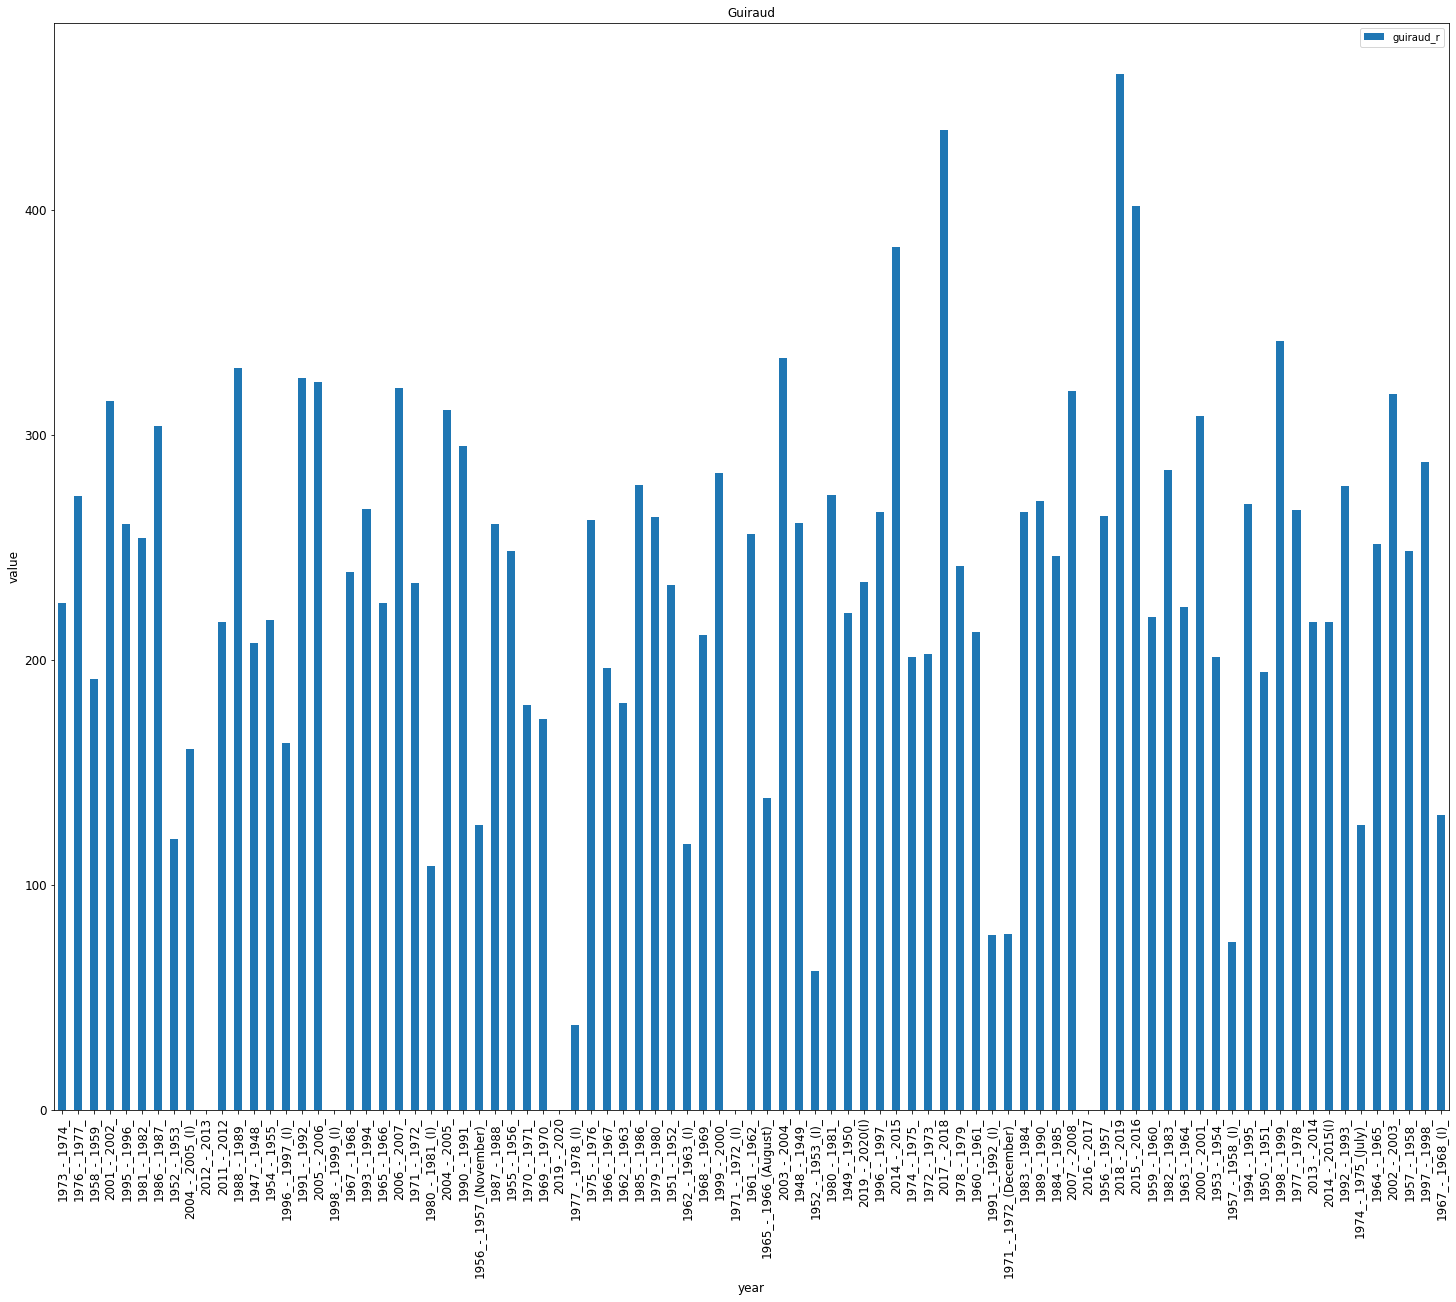

In [45]:
import matplotlib.pyplot as plt
ax = new_df.plot(x='year', y='guiraud_r', kind='bar', title ="Guiraud", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 2018-19 budget is the highest and that of 1977-78(I) is the lowest.

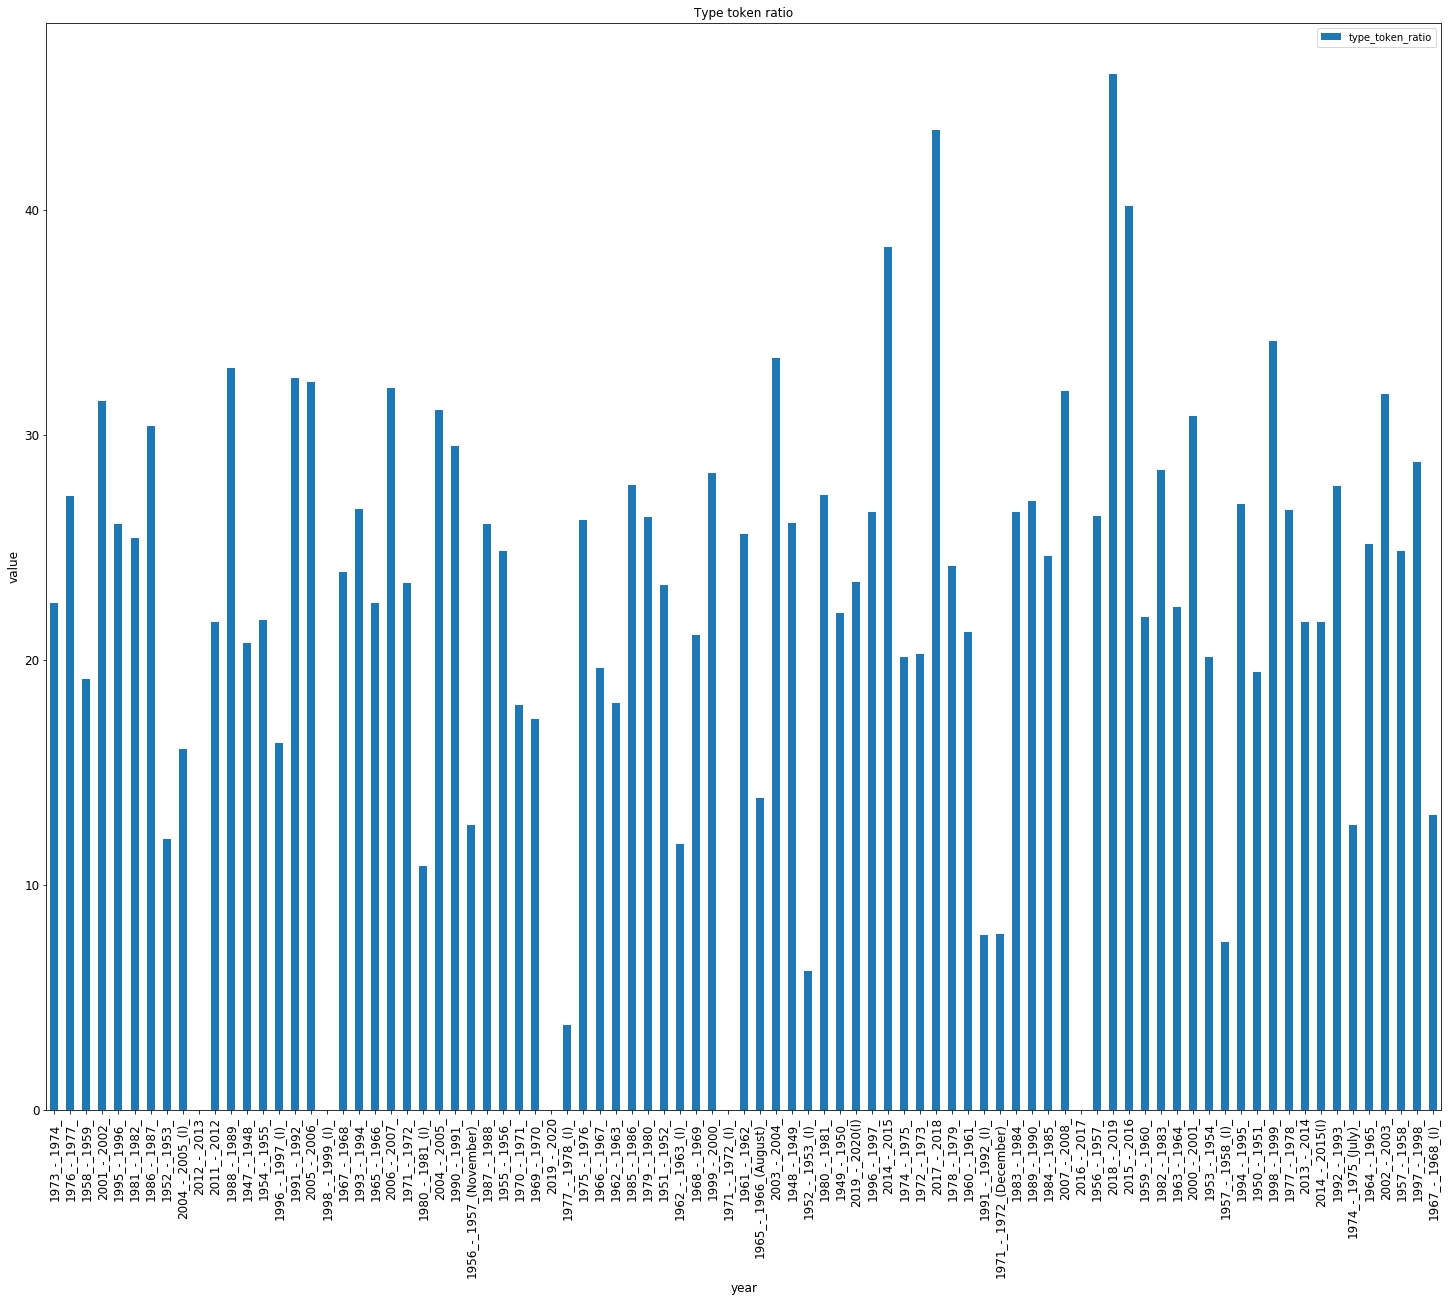

In [47]:
ax = new_df.plot(x='year', y='type_token_ratio', kind='bar', title ="Type token ratio", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 2018-19 budget is the highest and that of 1977-78(I) is the lowest.

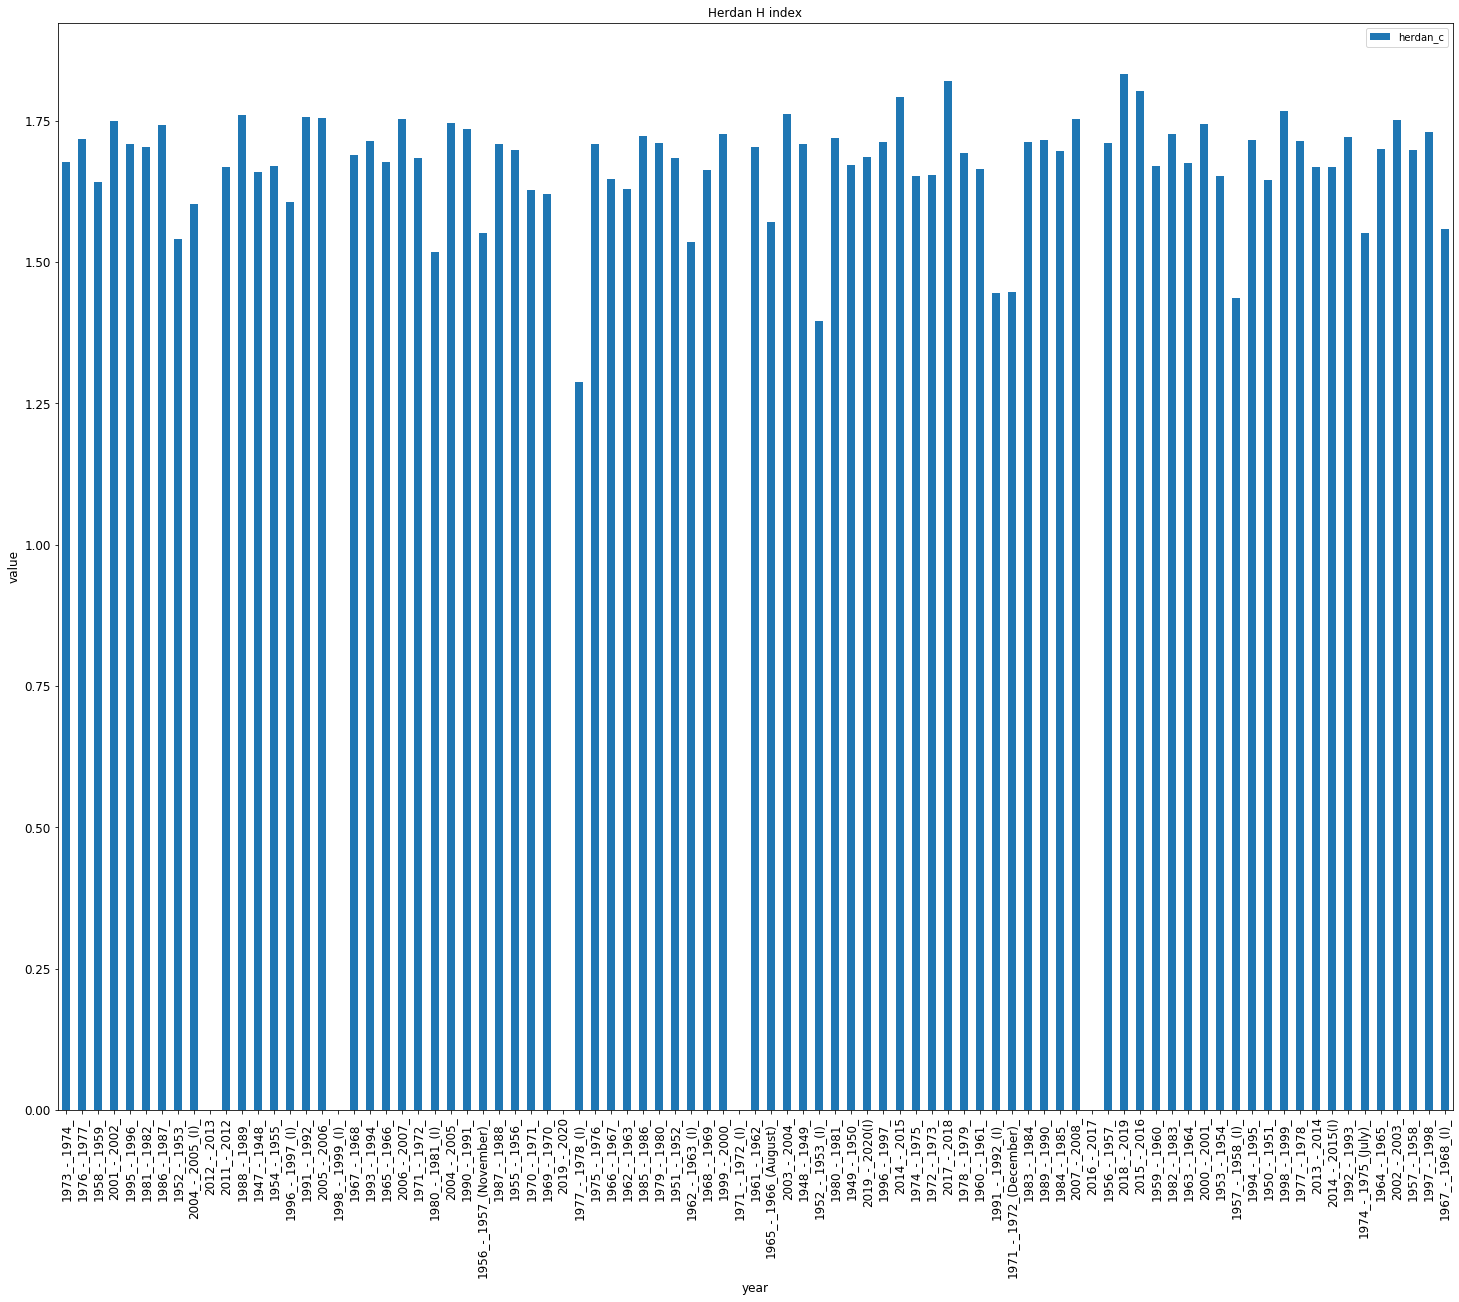

In [48]:
ax = new_df.plot(x='year', y='herdan_c', kind='bar', title ="Herdan H index", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 2018-19 budget is the highest and that of 1977-78(I) is the lowest.

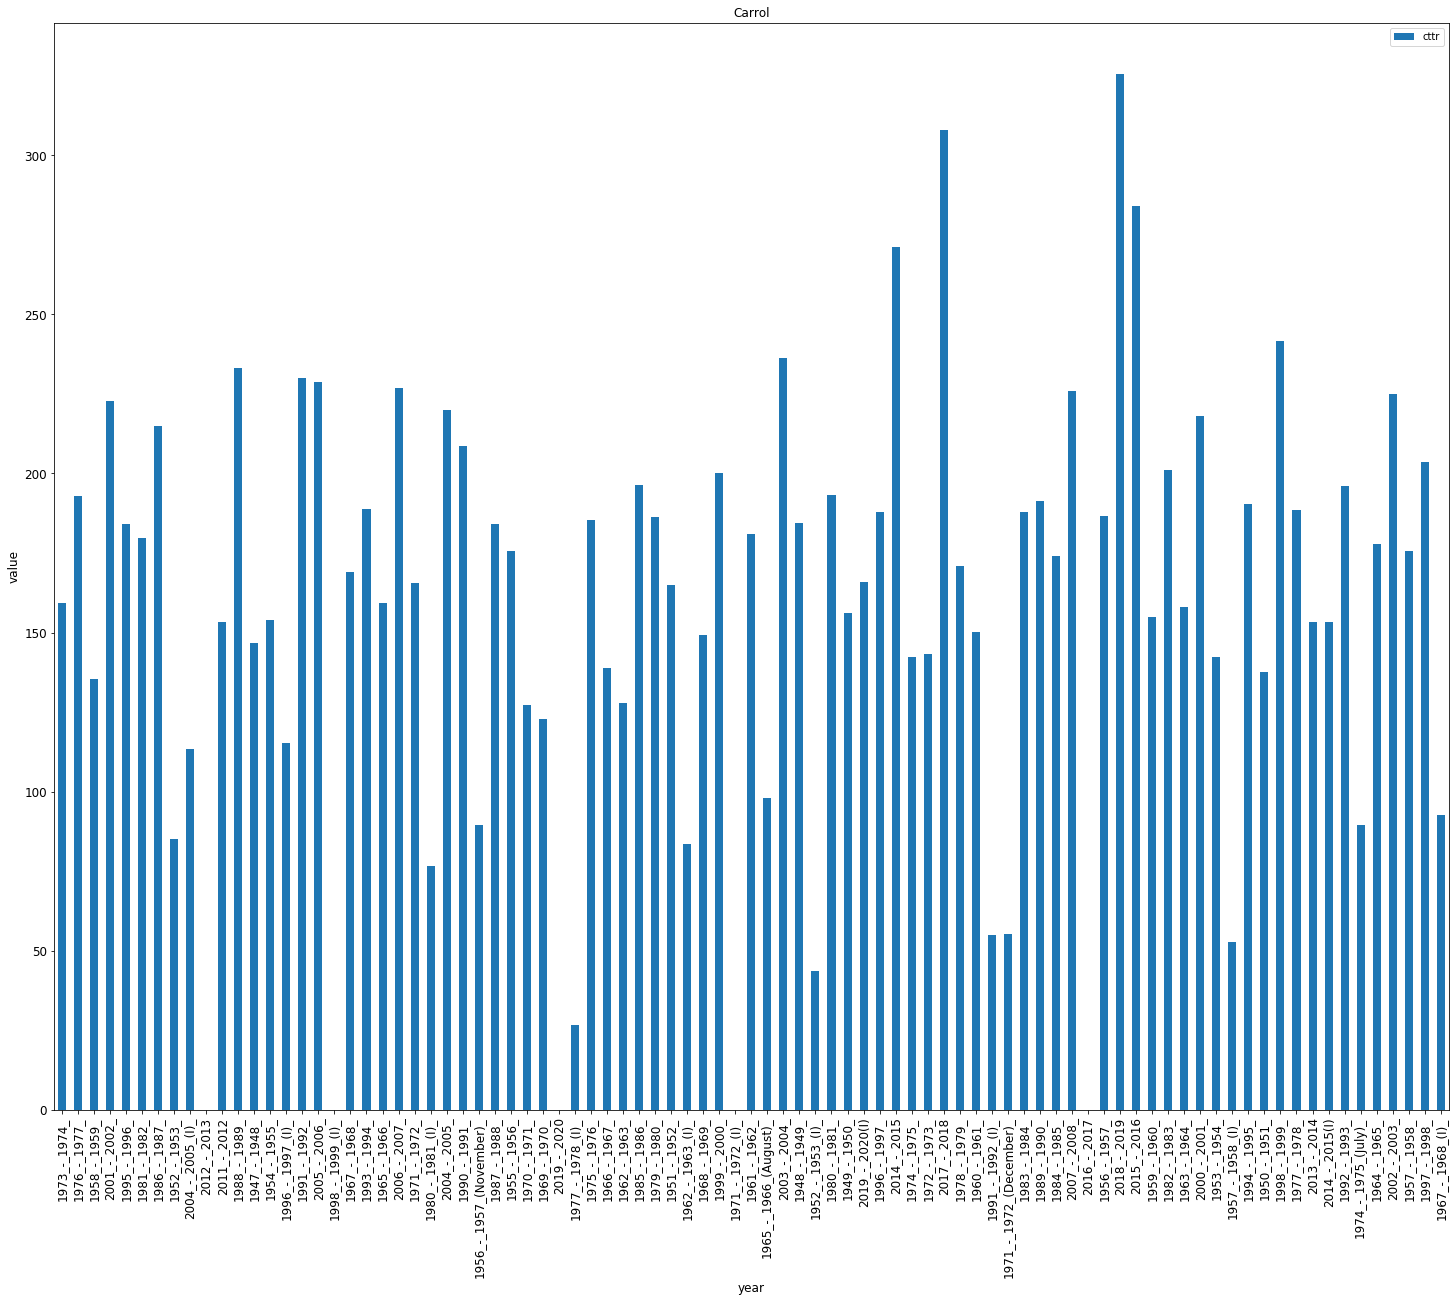

In [49]:
ax = new_df.plot(x='year', y='cttr', kind='bar', title ="Carrol", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 2018-19 budget is the highest and that of 1977-78(I) is the lowest.

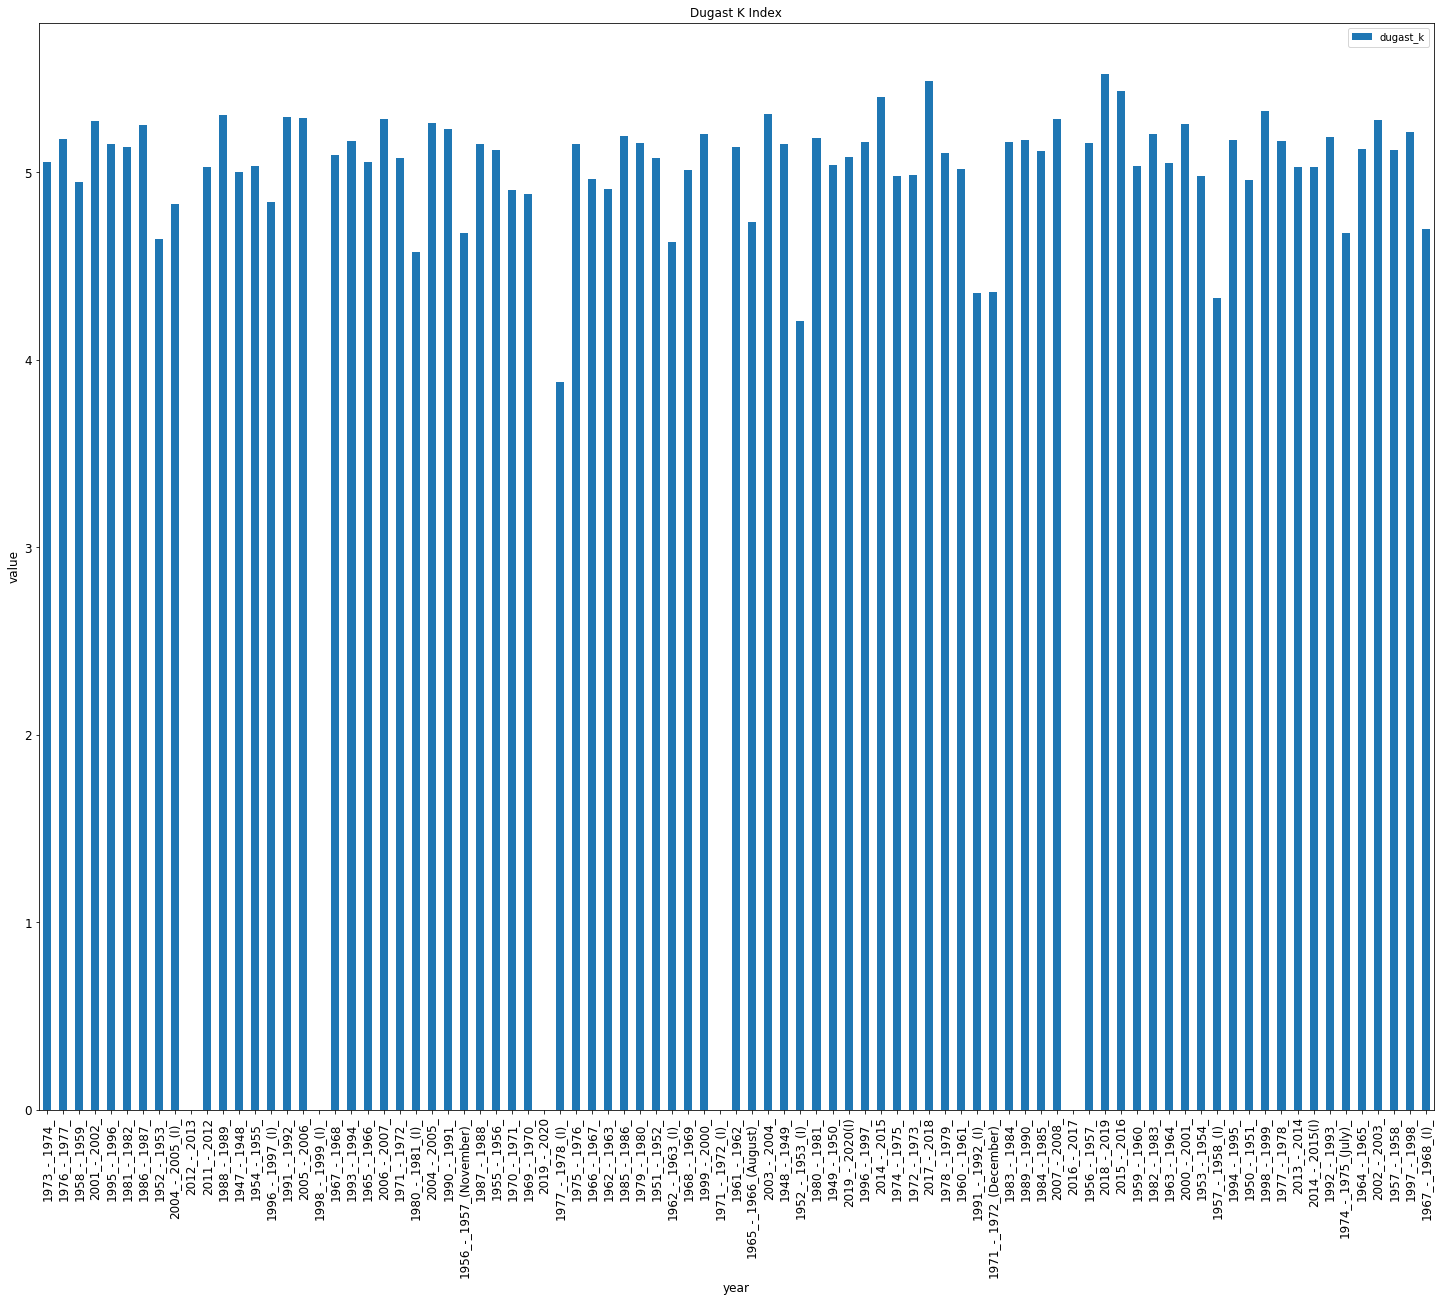

In [50]:
ax = new_df.plot(x='year', y='dugast_k', kind='bar', title ="Dugast K Index", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 2018-19 budget is the highest and that of 1977-78(I) is the lowest.

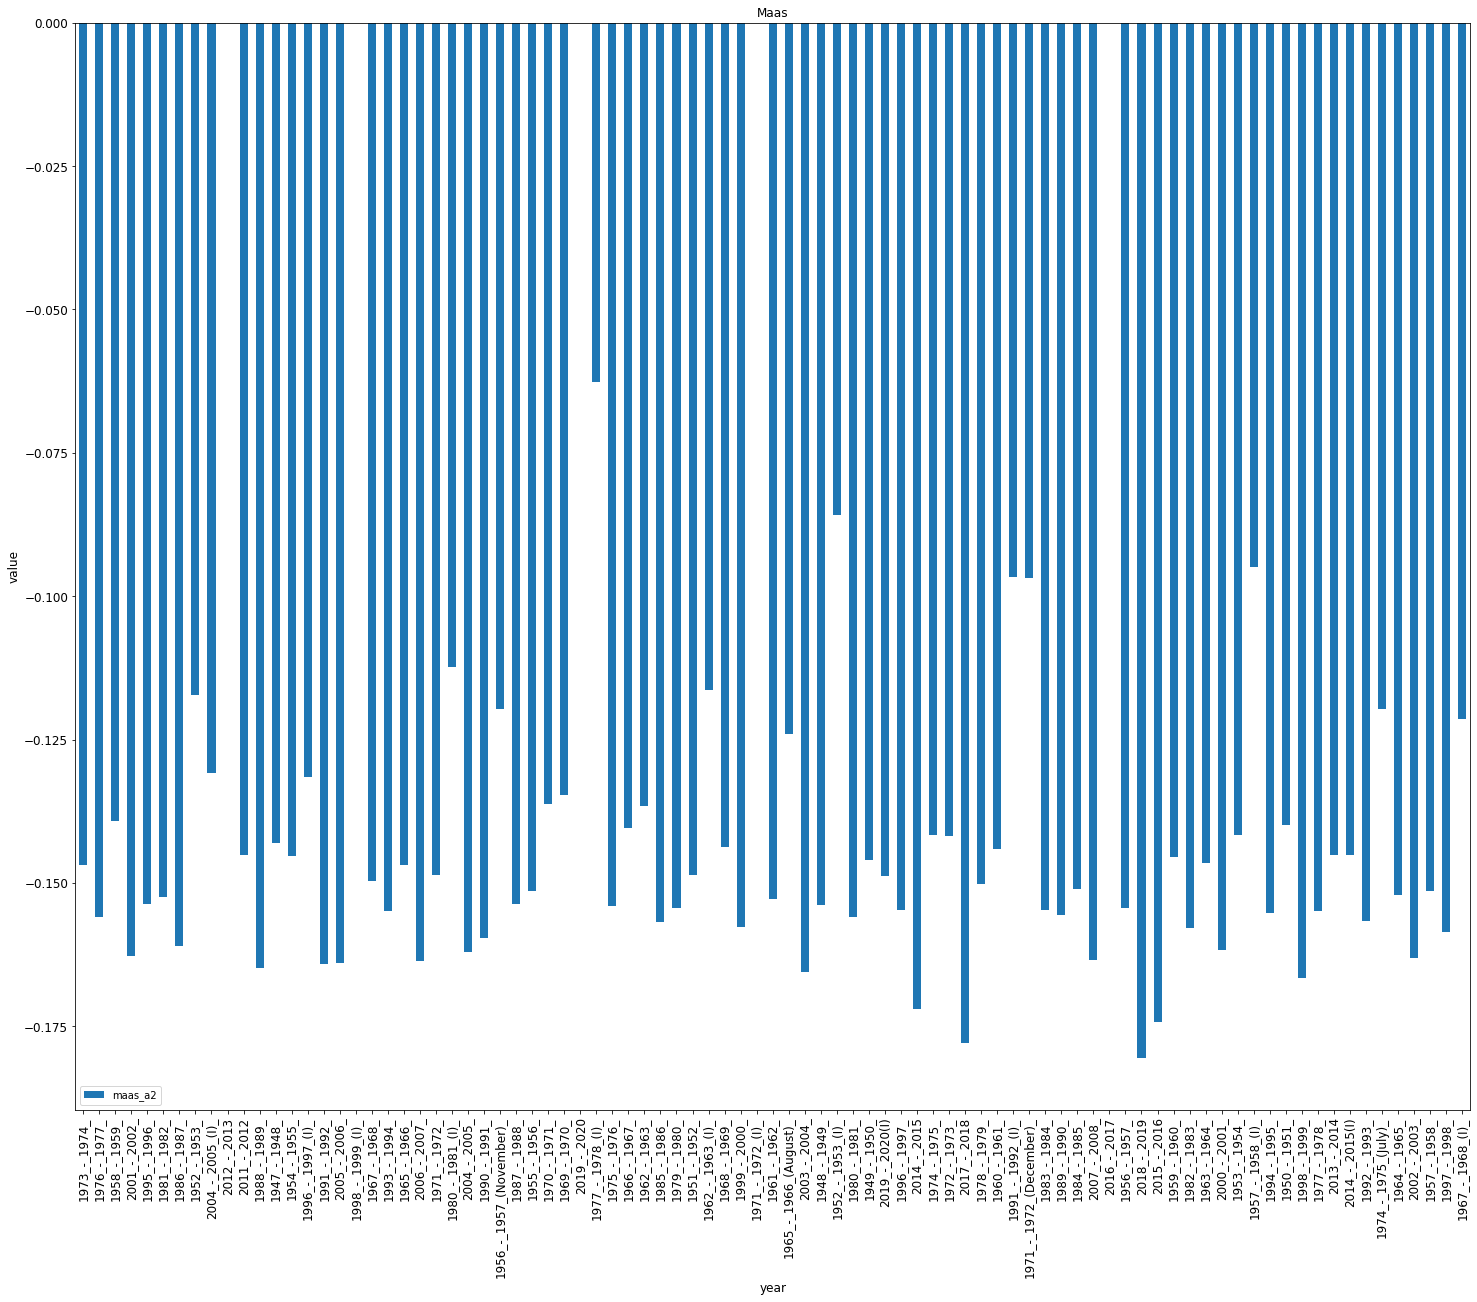

In [51]:
ax = new_df.plot(x='year', y='maas_a2', kind='bar', title ="Maas", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 2018-19 budget is the highest and that of 1977-78(I) is the lowest.

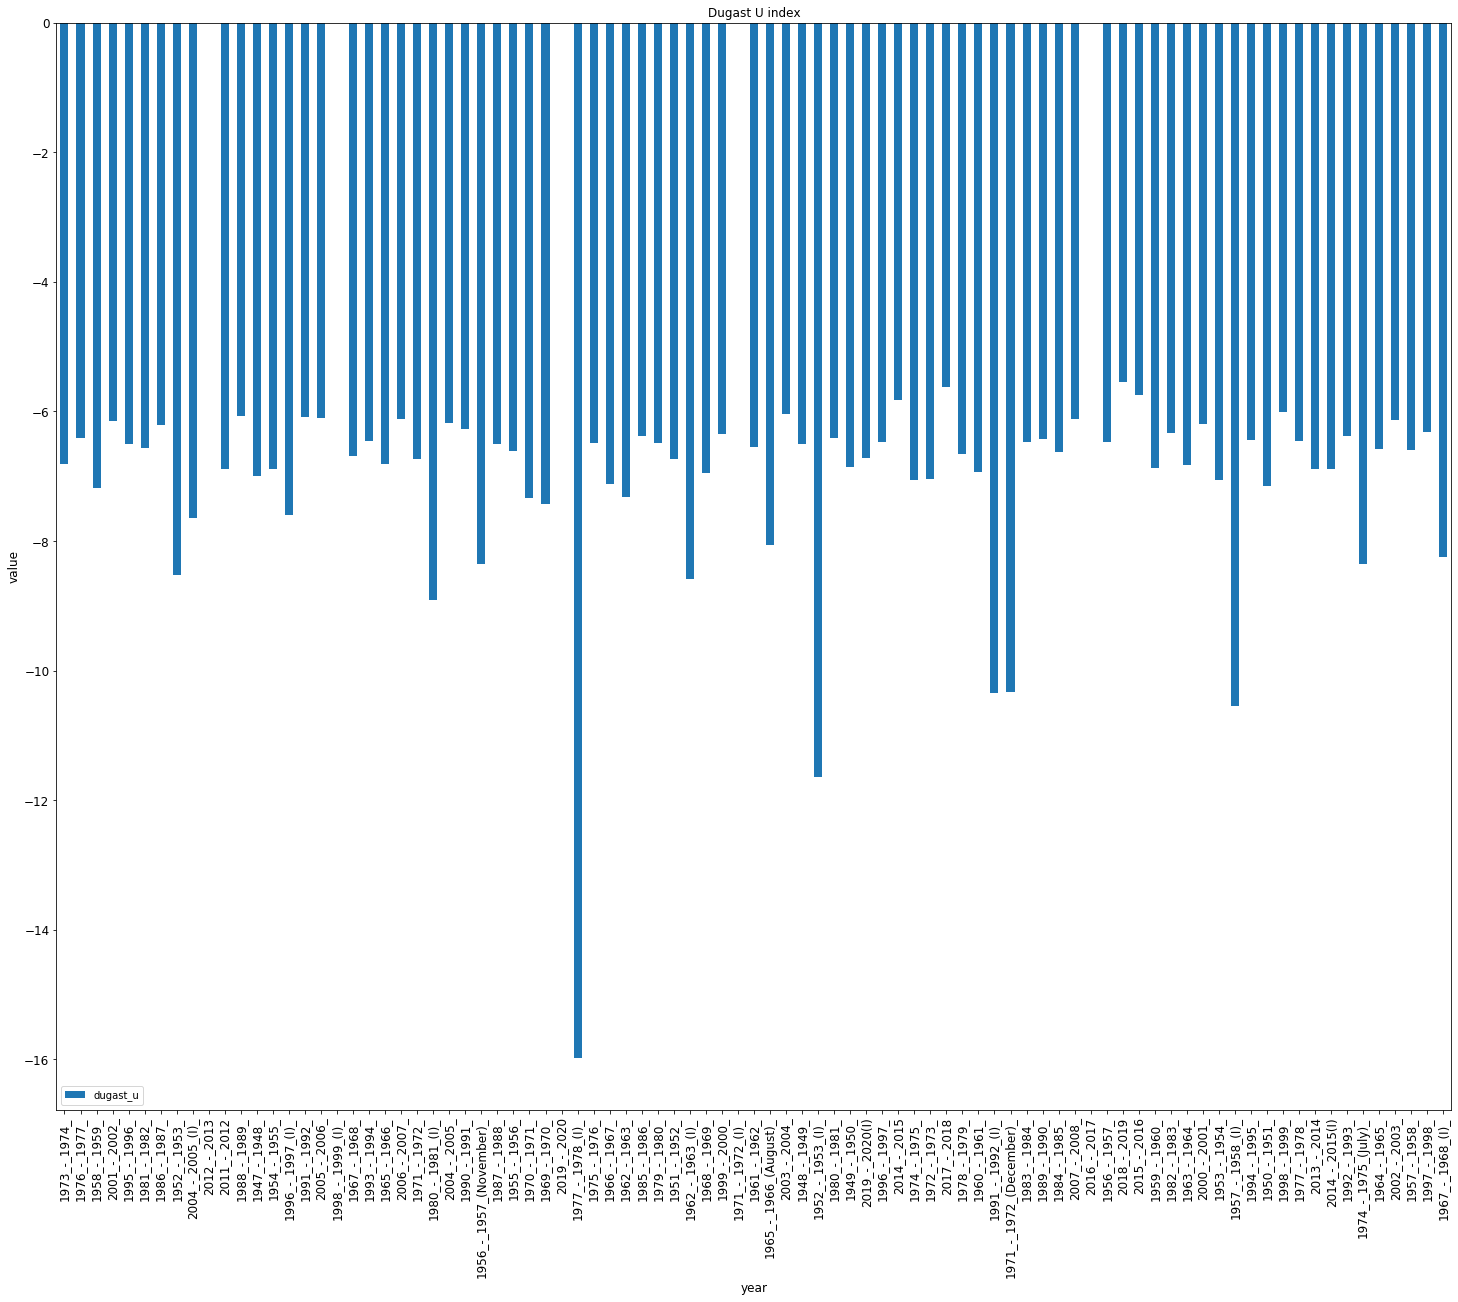

In [52]:
ax = new_df.plot(x='year', y='dugast_u', kind='bar', title ="Dugast U index", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 2018-19 budget is the highest and that of 1977-78(I) is the lowest.

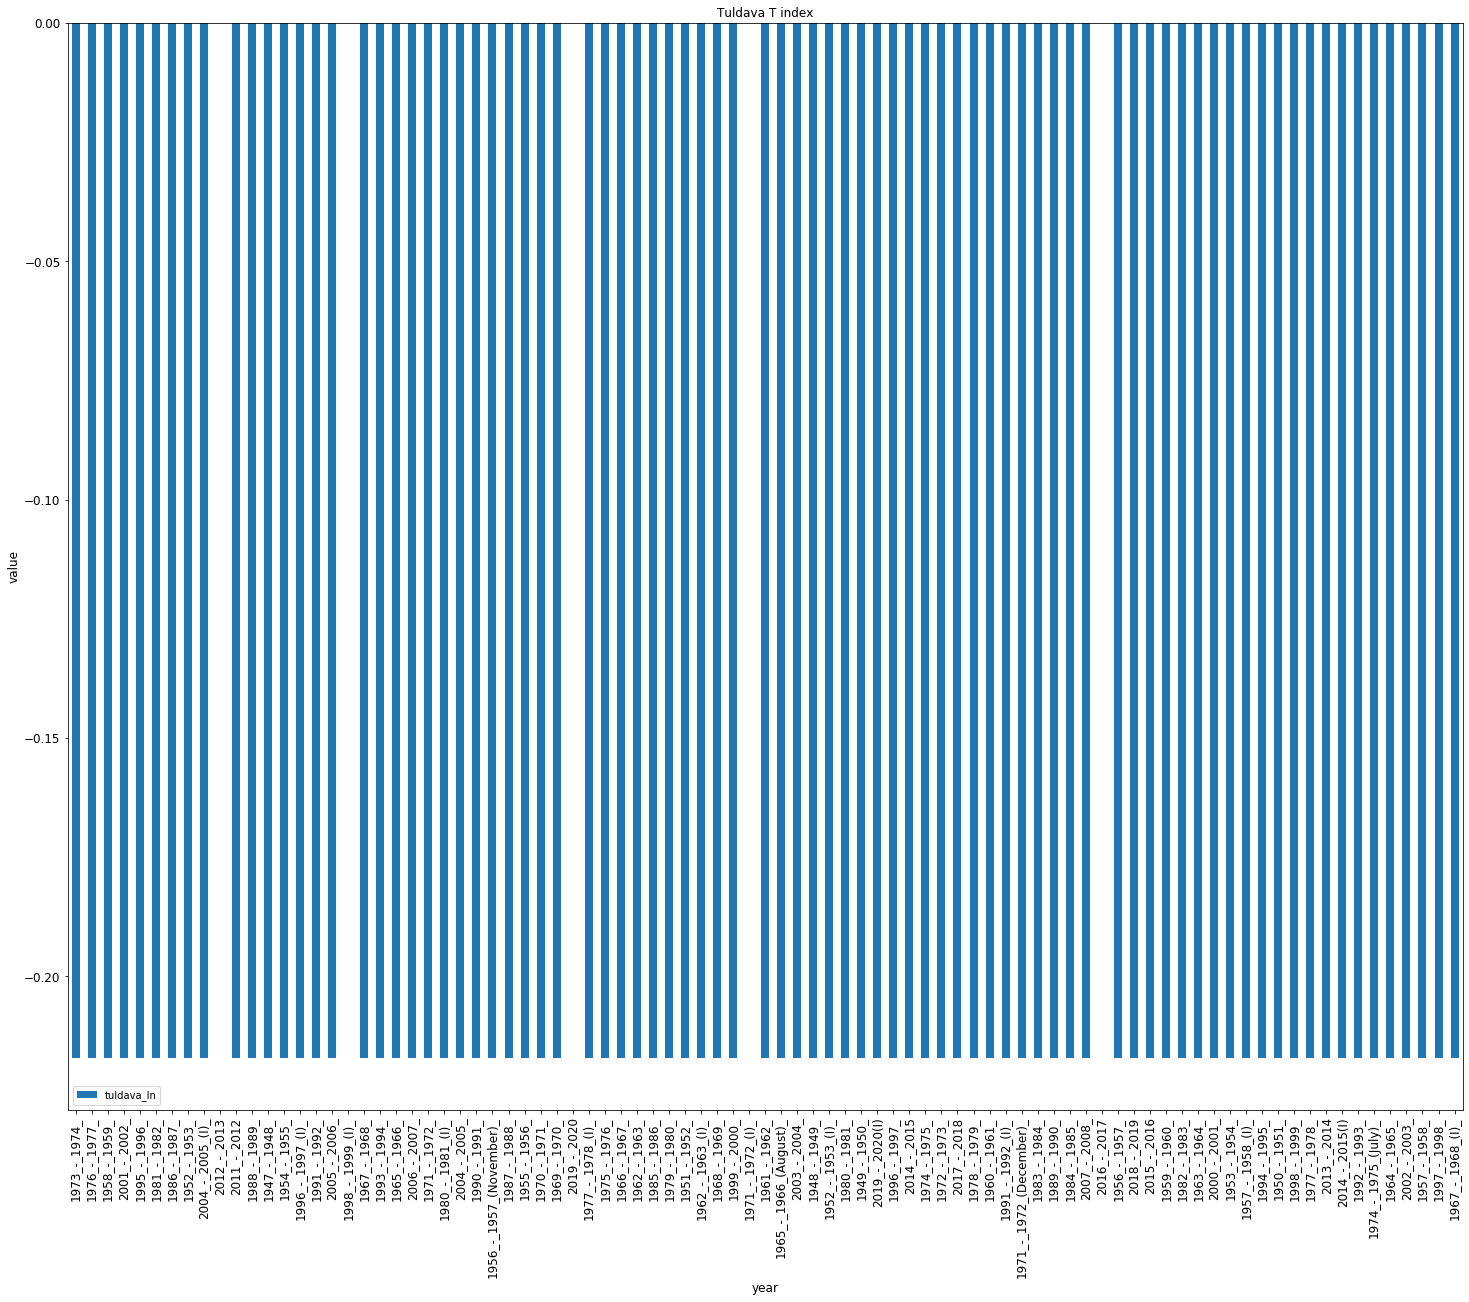

In [53]:
ax = new_df.plot(x='year', y='tuldava_ln', kind='bar', title ="Tuldava T index", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

I'm not sure why the values are uniform. need to double check the formulae

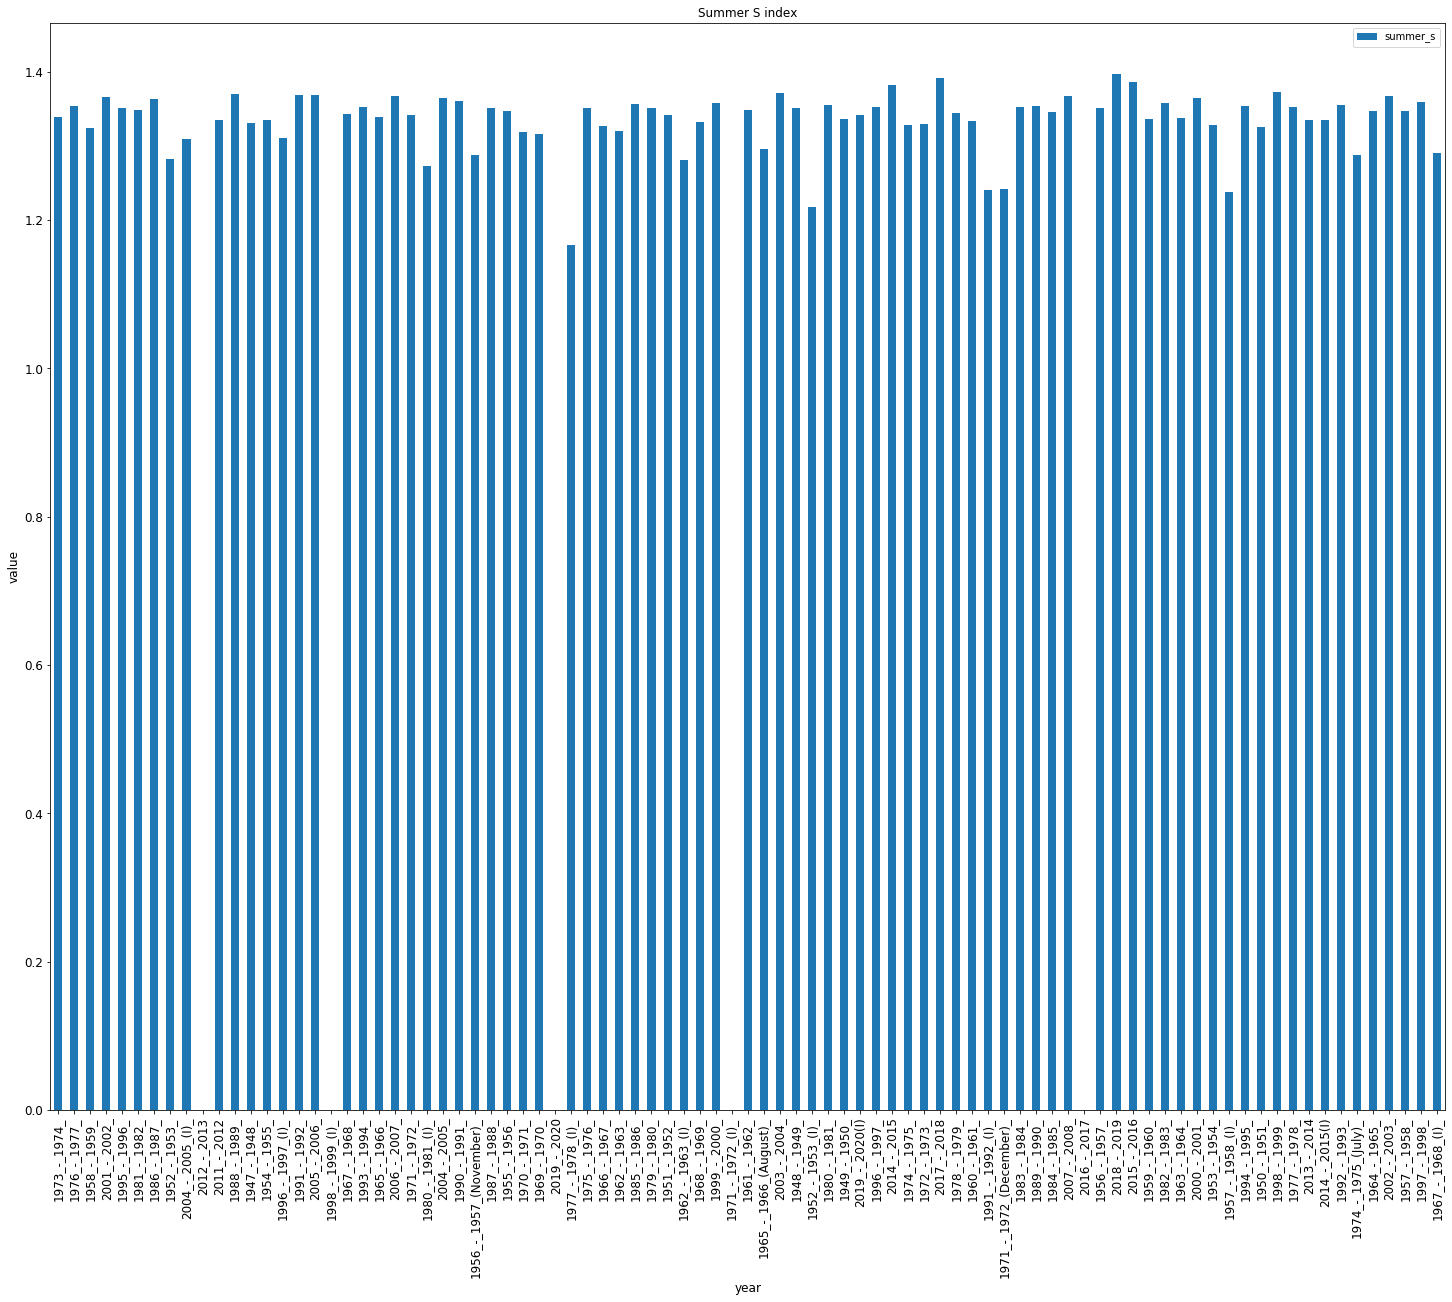

In [54]:
ax = new_df.plot(x='year', y='summer_s', kind='bar', title ="Summer S index", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 2018-19 budget is the highest and that of 1977-78(I) is the lowest.

### Discussion

More analysis to follow. (I've barely scratched the surface)